In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from highlight_text import fig_text, ax_text
from adjustText import adjust_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import scipy.stats as stats
import re

import urllib
import os

In [2]:
url = 'https://fbref.com/en/comps/Big5/possession/players/Big-5-European-Leagues-Stats#stats_possession::18'

tables = pd.read_html(url)
df1 = tables[0]

In [3]:
df1=df1.droplevel(0, axis=1) 

In [4]:
df1=df1[['Player','Succ%','Succ']]

In [5]:
df1

,Player,Succ%,Succ
0,Brenden Aaronson,32.3,21
1,Yunis Abdelhamid,50.0,7
2,Himad Abdelli,51.9,14
3,Salis Abdul Samed,54.2,13
4,Laurent Abergel,60.0,6
...,...,...,...
2625,Player,Succ%,Succ
2626,Szymon Żurkowski,50.0,1
2627,Martin Ødegaard,58.3,21
2628,Milan Đurić,33.3,1


In [6]:
#Deletes the row having that string
def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]
df1=filter_rows_by_values(df1, "Player", ["Player"])

In [7]:
df1=df1.reset_index(drop=True)

In [8]:
df1=df1.dropna()

In [9]:
df1=df1.reset_index(drop=True)
df1.head()

,Player,Succ%,Succ
0,Brenden Aaronson,32.3,21
1,Yunis Abdelhamid,50.0,7
2,Himad Abdelli,51.9,14
3,Salis Abdul Samed,54.2,13
4,Laurent Abergel,60.0,6


In [10]:
url1 = 'https://fbref.com/en/comps/Big5/playingtime/players/Big-5-European-Leagues-Stats#stats_playing_time'

tables1 = pd.read_html(url1)
df2 = tables1[0]

In [11]:
df2=df2.droplevel(0, axis=1) 

In [12]:
df2.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Min,...,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,On-Off,Matches
0,1,Brenden Aaronson,us USA,"MF,FW",Leeds United,eng Premier League,22-097,2000,19,1568,...,32,-8,-0.46,-1.09,23.3,27.6,-4.3,-0.25,-0.50,Matches
1,2,James Abankwah,ie IRL,DF,Udinese,it Serie A,19-011,2004,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches
2,3,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35-121,1987,19,1710,...,23,-2,-0.11,NaN,27.9,26.6,+1.3,+0.07,NaN,Matches
3,4,Himad Abdelli,fr FRA,"MF,FW",Angers,fr Ligue 1,23-071,1999,11,525,...,11,-5,-0.86,+0.59,8.5,9.5,-1.0,-0.17,+0.25,Matches
4,5,Salis Abdul Samed,gh GHA,MF,Lens,fr Ligue 1,22-307,2000,18,1619,...,11,+19,+1.06,+1.06,31.9,18.7,+13.2,+0.73,-0.57,Matches


In [13]:
df2=df2[['Player','Min','MP','Comp']]

In [14]:
df2.head()

,Player,Min,MP,Comp
0,Brenden Aaronson,1568,19,eng Premier League
1,James Abankwah,NaN,0,it Serie A
2,Yunis Abdelhamid,1710,19,fr Ligue 1
3,Himad Abdelli,525,11,fr Ligue 1
4,Salis Abdul Samed,1619,18,fr Ligue 1


In [15]:
#Deletes the row having that string
def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]
df2=filter_rows_by_values(df2, "Player", ["Player"])

In [16]:
df2.head(100)

,Player,Min,MP,Comp
0,Brenden Aaronson,1568,19,eng Premier League
1,James Abankwah,NaN,0,it Serie A
2,Yunis Abdelhamid,1710,19,fr Ligue 1
3,Himad Abdelli,525,11,fr Ligue 1
4,Salis Abdul Samed,1619,18,fr Ligue 1
...,...,...,...,...
98,Agustín Álvarez Martínez,267,14,it Serie A
99,Yeray Álvarez,1295,15,es La Liga
100,Steven Alzate,NaN,0,eng Premier League
101,Ibrahim Amadou,401,6,fr Ligue 1


In [17]:
df2=df2.dropna()

In [18]:
df2=df2.reset_index(drop=True)
df2.head()

,Player,Min,MP,Comp
0,Brenden Aaronson,1568,19,eng Premier League
1,Yunis Abdelhamid,1710,19,fr Ligue 1
2,Himad Abdelli,525,11,fr Ligue 1
3,Salis Abdul Samed,1619,18,fr Ligue 1
4,Laurent Abergel,1120,14,fr Ligue 1


In [19]:
merged_df = pd.merge(df1, df2, on='Player')


In [20]:
merged_df.head(50)

,Player,Succ%,Succ,Min,MP,Comp
0,Brenden Aaronson,32.3,21,1568,19,eng Premier League
1,Yunis Abdelhamid,50.0,7,1710,19,fr Ligue 1
2,Himad Abdelli,51.9,14,525,11,fr Ligue 1
3,Salis Abdul Samed,54.2,13,1619,18,fr Ligue 1
4,Laurent Abergel,60.0,6,1120,14,fr Ligue 1
5,Matthis Abline,0.0,0,53,2,fr Ligue 1
6,Matthis Abline,0.0,0,107,11,fr Ligue 1
7,Abner,0.0,0,80,1,es La Liga
8,Zakaria Aboukhlal,33.3,16,1309,19,fr Ligue 1
9,Tammy Abraham,23.3,10,1338,19,it Serie A


In [21]:
merged_df[merged_df['Player'].duplicated()]


,Player,Succ%,Succ,Min,MP,Comp
6,Matthis Abline,0.0,0,107,11,fr Ligue 1
39,Ludovic Ajorque,50.0,2,11,1,de Bundesliga
40,Ludovic Ajorque,0.0,0,771,13,fr Ligue 1
41,Ludovic Ajorque,0.0,0,11,1,de Bundesliga
81,Bruno Amione,0.0,0,610,8,it Serie A
...,...,...,...,...,...,...
2198,Akim Zedadka,37.5,3,315,4,fr Ligue 1
2199,Akim Zedadka,37.5,3,354,8,fr Ligue 1
2215,Szymon Żurkowski,0.0,0,8,1,it Serie A
2216,Szymon Żurkowski,50.0,1,32,2,it Serie A


In [22]:
merged_df[['Min','Succ%','Succ','MP']] = merged_df[['Min','Succ%','Succ','MP']].apply(pd.to_numeric)


In [23]:
print(merged_df.dtypes)

Player     object
Succ%     float64
Succ        int64
Min         int64
MP          int64
Comp       object
dtype: object


In [24]:
merged_df=merged_df[(merged_df['Min'] >=1000)]
merged_df

,Player,Succ%,Succ,Min,MP,Comp
0,Brenden Aaronson,32.3,21,1568,19,eng Premier League
1,Yunis Abdelhamid,50.0,7,1710,19,fr Ligue 1
3,Salis Abdul Samed,54.2,13,1619,18,fr Ligue 1
4,Laurent Abergel,60.0,6,1120,14,fr Ligue 1
8,Zakaria Aboukhlal,33.3,16,1309,19,fr Ligue 1
...,...,...,...,...,...,...
2211,Kurt Zouma,0.0,0,1274,15,eng Premier League
2212,Igor Zubeldia,100.0,1,1077,14,es La Liga
2213,Martín Zubimendi,44.4,4,1421,17,es La Liga
2218,Martin Ødegaard,58.3,21,1518,18,eng Premier League


In [25]:
merged_df=merged_df[(merged_df['Succ'] >8)]
merged_df

,Player,Succ%,Succ,Min,MP,Comp
0,Brenden Aaronson,32.3,21,1568,19,eng Premier League
3,Salis Abdul Samed,54.2,13,1619,18,fr Ligue 1
8,Zakaria Aboukhlal,33.3,16,1309,19,fr Ligue 1
9,Tammy Abraham,23.3,10,1338,19,it Serie A
13,Che Adams,43.5,10,1480,19,eng Premier League
...,...,...,...,...,...,...
2180,Wilfried Zaha,35.2,32,1661,19,eng Premier League
2187,Andre-Frank Zambo Anguissa,37.8,14,1414,17,it Serie A
2204,Piotr Zieliński,29.4,10,1164,19,it Serie A
2218,Martin Ødegaard,58.3,21,1518,18,eng Premier League


In [26]:
merged_df[merged_df['Player'].duplicated()]

,Player,Succ%,Succ,Min,MP,Comp
1171,Armand Lauriente,82.4,14,1063,13,it Serie A


In [27]:
merged_df['Comp'] = merged_df['Comp'].replace(to_replace=re.compile(r'^(eng|fr|es|de|it) '), value='', regex=True)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10896\3212205864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Comp'] = merged_df['Comp'].replace(to_replace=re.compile(r'^(eng|fr|es|de|it) '), value='', regex=True)


In [28]:
merged_df

,Player,Succ%,Succ,Min,MP,Comp
0,Brenden Aaronson,32.3,21,1568,19,Premier League
3,Salis Abdul Samed,54.2,13,1619,18,Ligue 1
8,Zakaria Aboukhlal,33.3,16,1309,19,Ligue 1
9,Tammy Abraham,23.3,10,1338,19,Serie A
13,Che Adams,43.5,10,1480,19,Premier League
...,...,...,...,...,...,...
2180,Wilfried Zaha,35.2,32,1661,19,Premier League
2187,Andre-Frank Zambo Anguissa,37.8,14,1414,17,Serie A
2204,Piotr Zieliński,29.4,10,1164,19,Serie A
2218,Martin Ødegaard,58.3,21,1518,18,Premier League


In [29]:
merged_df[merged_df['Player'] == 'Armand Lauriente']

,Player,Succ%,Succ,Min,MP,Comp
1169,Armand Lauriente,41.4,24,1063,13,Serie A
1171,Armand Lauriente,82.4,14,1063,13,Serie A


In [30]:
merged_df.drop([1171], inplace=True)
merged_df


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10896\2894031940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.drop([1171], inplace=True)


,Player,Succ%,Succ,Min,MP,Comp
0,Brenden Aaronson,32.3,21,1568,19,Premier League
3,Salis Abdul Samed,54.2,13,1619,18,Ligue 1
8,Zakaria Aboukhlal,33.3,16,1309,19,Ligue 1
9,Tammy Abraham,23.3,10,1338,19,Serie A
13,Che Adams,43.5,10,1480,19,Premier League
...,...,...,...,...,...,...
2180,Wilfried Zaha,35.2,32,1661,19,Premier League
2187,Andre-Frank Zambo Anguissa,37.8,14,1414,17,Serie A
2204,Piotr Zieliński,29.4,10,1164,19,Serie A
2218,Martin Ødegaard,58.3,21,1518,18,Premier League


In [31]:
merged_df=merged_df.reset_index(drop=True)

In [32]:
merged_df['name_parts'] = merged_df['Player'].str.count(' ')


In [33]:
def split_name(row):
    name_parts = re.split('\s(?=[A-Z])', row['Player'])
    if row['name_parts']==0:
        return pd.Series({'first_name': ' ', 'last_name': name_parts[0]})
    elif len(name_parts) == 1:
        return pd.Series({'first_name': name_parts[0], 'last_name': ' '})
    else:
        return pd.Series({'first_name': name_parts[0], 'last_name': ' '.join(name_parts[1:])})

merged_df[['first_name', 'last_name']] = merged_df.apply(split_name, axis=1)

In [34]:
merged_df.head(10)

,Player,Succ%,Succ,Min,MP,Comp,name_parts,first_name,last_name
0,Brenden Aaronson,32.3,21,1568,19,Premier League,1,Brenden,Aaronson
1,Salis Abdul Samed,54.2,13,1619,18,Ligue 1,2,Salis,Abdul Samed
2,Zakaria Aboukhlal,33.3,16,1309,19,Ligue 1,1,Zakaria,Aboukhlal
3,Tammy Abraham,23.3,10,1338,19,Serie A,1,Tammy,Abraham
4,Che Adams,43.5,10,1480,19,Premier League,1,Che,Adams
5,Kevin Agudelo,38.9,14,1185,18,Serie A,1,Kevin,Agudelo
6,Naouirou Ahamada,42.9,18,1398,17,Bundesliga,1,Naouirou,Ahamada
7,Sergio Akieme,53.7,22,1620,18,La Liga,1,Sergio,Akieme
8,Thiago Alcántara,62.5,15,1070,13,Premier League,1,Thiago,Alcántara
9,Carles Aleñá,54.2,13,1293,17,La Liga,1,Carles,Aleñá


In [35]:
merged_df = merged_df.assign(per_90 = lambda x: (x.Succ/x.Min)*90)

In [45]:
merged_df.sort_values(by='per_90')

,Player,succ_per,Succ,Min,MP,Comp,name_parts,first_name,last_name,per_90,zscore,annotated,succ_rate
269,Kieran Trippier,45.0,9,1774,20,Premier League,1,Kieran,Trippier,0.456595,-0.678346,False,0.450
208,Andreas Pereira,29.0,9,1726,21,Premier League,1,Andreas,Pereira,0.469293,-1.334278,False,0.290
84,Bruno Fernandes,32.1,9,1708,19,Premier League,1,Bruno,Fernandes,0.474239,-1.198985,False,0.321
37,Jarrod Bowen,20.4,10,1790,20,Premier League,1,Jarrod,Bowen,0.502793,-1.657285,False,0.204
193,M'Bala Nzola,26.5,9,1596,18,Serie A,1,M'Bala,Nzola,0.507519,-1.396611,False,0.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,Saïd Benrahma,37.7,29,1054,18,Premier League,1,Saïd,Benrahma,2.476281,1.253844,True,0.377
225,Georginio Rutter,46.4,32,1009,15,Bundesliga,1,Georginio,Rutter,2.854311,2.037027,True,0.464
235,Leroy Sané,58.9,33,1019,15,Bundesliga,1,Leroy,Sané,2.914622,2.627293,True,0.589
200,Azzedine Ounahi,53.4,39,1129,15,Ligue 1,1,Azzedine,Ounahi,3.108946,2.612297,True,0.534


In [48]:
merged_df[merged_df['Player'] == 'Kaoru Mitoma']

,Player,succ_per,Succ,Min,MP,Comp,name_parts,first_name,last_name,per_90,zscore,annotated,succ_rate


In [37]:
merged_df['zscore'] = stats.zscore(merged_df['per_90'])*.55 + stats.zscore((merged_df['Succ%'])/100)*.45
merged_df['annotated'] = [True if x > merged_df['zscore'].quantile(.85) else False for x in merged_df['zscore']]

In [49]:
merged_df[merged_df['last_name'] == 'Saka']

,Player,succ_per,Succ,Min,MP,Comp,name_parts,first_name,last_name,per_90,zscore,annotated,succ_rate
227,Bukayo Saka,31.9,22,1621,19,Premier League,1,Bukayo,Saka,1.221468,-0.379406,False,0.319


In [39]:
merged_df[merged_df['first_name'].str.startswith('P')]

,Player,Succ%,Succ,Min,MP,Comp,name_parts,first_name,last_name,per_90,zscore,annotated
32,Philip Billing,45.5,10,1400,19,Premier League,1,Philip,Billing,0.642857,-0.451024,False
86,Phil Foden,37.9,11,1045,18,Premier League,1,Phil,Foden,0.947368,-0.431866,False
120,Pierre Højbjerg,73.3,11,1781,20,Premier League,1,Pierre,Højbjerg,0.555867,0.616717,False
162,Pablo Maffeo,23.7,9,1316,16,La Liga,1,Pablo,Maffeo,0.615502,-1.394213,False
170,Pasquale Mazzocchi,47.1,24,1199,15,Serie A,1,Pasquale,Mazzocchi,1.801501,0.899792,True
181,Pere Milla,36.0,9,1075,17,La Liga,1,Pere,Milla,0.753488,-0.726255,False
198,Paulo Otávio,42.3,11,1199,14,Bundesliga,1,Paulo,Otávio,0.825688,-0.382442,False
251,Pascal Struijk,52.9,9,1589,18,Premier League,1,Pascal,Struijk,0.509755,-0.288630,False
267,Pau Torres,60.0,9,1530,17,La Liga,1,Pau,Torres,0.529412,0.030464,False
287,Piotr Zieliński,29.4,10,1164,19,Serie A,1,Piotr,Zieliński,0.773196,-0.980794,False


In [40]:
merged_df = merged_df.rename(columns = {'Succ%':'succ_per'})

In [41]:
merged_df = merged_df.assign(succ_rate = lambda x: x.succ_per/100)

In [42]:
merged_df

,Player,succ_per,Succ,Min,MP,Comp,name_parts,first_name,last_name,per_90,zscore,annotated,succ_rate
0,Brenden Aaronson,32.3,21,1568,19,Premier League,1,Brenden,Aaronson,1.205357,-0.380507,False,0.323
1,Salis Abdul Samed,54.2,13,1619,18,Ligue 1,2,Salis,Abdul Samed,0.722668,0.001723,False,0.542
2,Zakaria Aboukhlal,33.3,16,1309,19,Ligue 1,1,Zakaria,Aboukhlal,1.100076,-0.455287,False,0.333
3,Tammy Abraham,23.3,10,1338,19,Serie A,1,Tammy,Abraham,0.672646,-1.347645,False,0.233
4,Che Adams,43.5,10,1480,19,Premier League,1,Che,Adams,0.608108,-0.573277,False,0.435
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,Wilfried Zaha,35.2,32,1661,19,Premier League,1,Wilfried,Zaha,1.733895,0.326568,False,0.352
286,Andre-Frank Zambo Anguissa,37.8,14,1414,17,Serie A,2,Andre-Frank,Zambo Anguissa,0.891089,-0.498413,False,0.378
287,Piotr Zieliński,29.4,10,1164,19,Serie A,1,Piotr,Zieliński,0.773196,-0.980794,False,0.294
288,Martin Ødegaard,58.3,21,1518,18,Premier League,1,Martin Ødegaard,,1.245059,0.752237,False,0.583


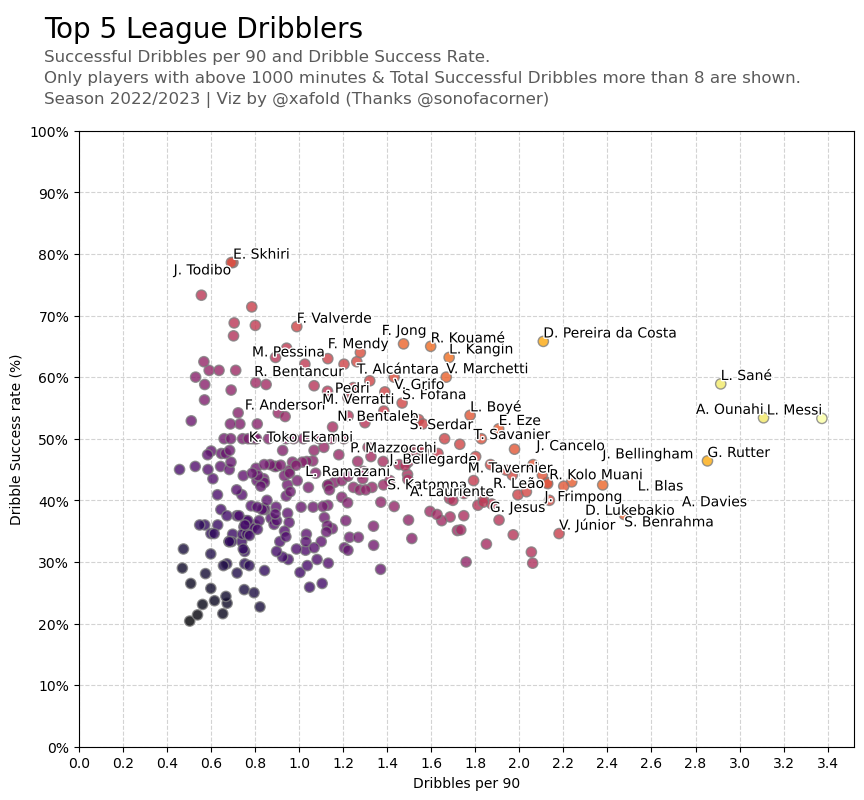

In [43]:
fig = plt.figure(figsize=(10,8), dpi=100)
ax = plt.subplot()
ax.grid(visible=True, ls='--', color='lightgrey')

ax.scatter(
    merged_df['per_90'], merged_df['succ_rate'], 
    c=merged_df['zscore'], cmap='inferno', 
    zorder=3, ec='grey', s=55, alpha=0.8)
    
texts = []
annotated_df = merged_df[merged_df['annotated']].reset_index(drop=True)
for index in range(annotated_df.shape[0]):
    texts += [
        ax.text(
            x=annotated_df['per_90'].iloc[index], y=annotated_df['succ_rate'].iloc[index],
            s=f"{annotated_df['first_name'].iloc[index][0]}. {annotated_df['last_name'].iloc[index]}",
            path_effects=[path_effects.Stroke(linewidth=2, foreground=fig.get_facecolor()), 
            path_effects.Normal()], color='black'
            #family='DM Sans', weight='bold'
        )
    ]

adjust_text(texts, only_move={'points':'y', 'text':'xy', 'objects':'xy'})

ax.xaxis.set_major_locator(ticker.MultipleLocator(.2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0%}'))
ax.set_xlim(0)
ax.set_ylim(0,1)

ax.set_ylabel('Dribble Success rate (%)')
ax.set_xlabel('Dribbles per 90')

fig_text(
    x = 0.09, y = .99, 
    s = "Top 5 League Dribblers",
    va = "bottom", ha = "left",
    fontsize = 20, color = "black" #font = "DM Sans", weight = "bold"
)

fig_text(
    x = 0.09, y = 0.91, 
    s = "Successful Dribbles per 90 and Dribble Success Rate.\nOnly players with above 1000 minutes & Total Successful Dribbles more than 8 are shown.\nSeason 2022/2023 | Viz by @xafold (Thanks @sonofacorner)",
    va = "bottom", ha = "left",
    fontsize = 12, color = "#5A5A5A" #font = "Karla"
)

plt.savefig(
    "top_5_league_dribbles.png",
    dpi = 800,
    facecolor = "#FFFFFF",
    bbox_inches="tight",
    edgecolor="none",
    transparent = False
)

plt.savefig(
    "top_5_league_dribbles_tr.png",
    dpi = 800,
    facecolor = "none",
    bbox_inches="tight",
    edgecolor="none",
    transparent = True
)
plt.show()